In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

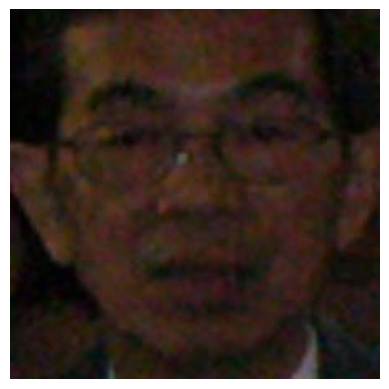

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# Kép beolvasása
image_path = "/kaggle/input/fairface/FairFace/train/1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV BGR-t használ, ezért RGB-re kell konvertálni

# Kép megjelenítése
plt.imshow(image)
plt.axis("off")  # Kikapcsolja a tengelyeket
plt.show()


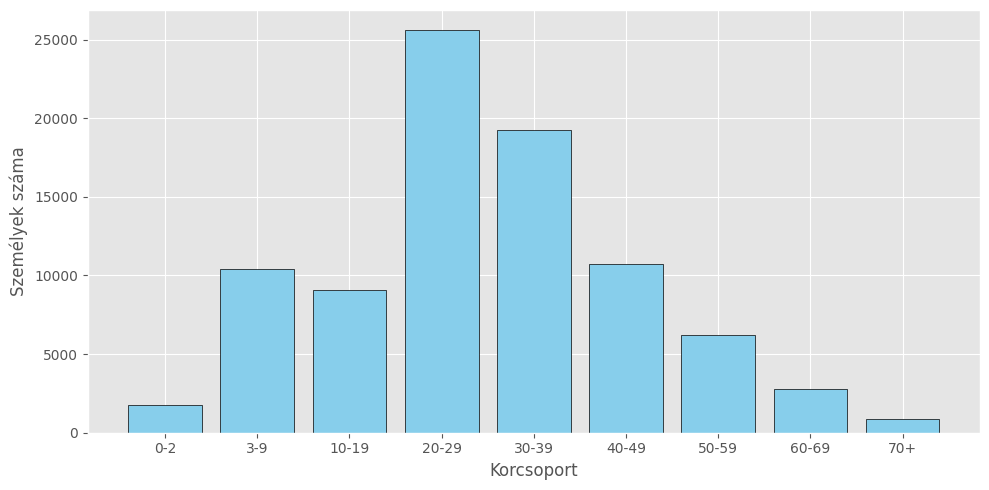

In [2]:
# Adatok beolvasása
df = pd.read_csv("/kaggle/input/fairface/FairFace/train_labels.csv")

# Eredeti korcsoport kulcsok (adatbázisból)
age_categories = [
    "0-2", "3-9", "10-19", "20-29", "30-39",
    "40-49", "50-59", "60-69", "more than 70"
]

# Ploton megjelenő címkék (utolsó módosítva)
age_labels = [
    "0-2", "3-9", "10-19", "20-29", "30-39",
    "40-49", "50-59", "60-69", "70+"
]

# Előfordulások számlálása
age_counts = df["age"].value_counts().reindex(age_categories, fill_value=0)

# Plot kirajzolása
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
bars = plt.bar(age_labels, age_counts, color="skyblue", edgecolor="black")
plt.xlabel("Korcsoport")
plt.ylabel("Személyek száma")
plt.grid(axis="y", color="white", linestyle="-", linewidth=0.8)
plt.tight_layout()
plt.show()


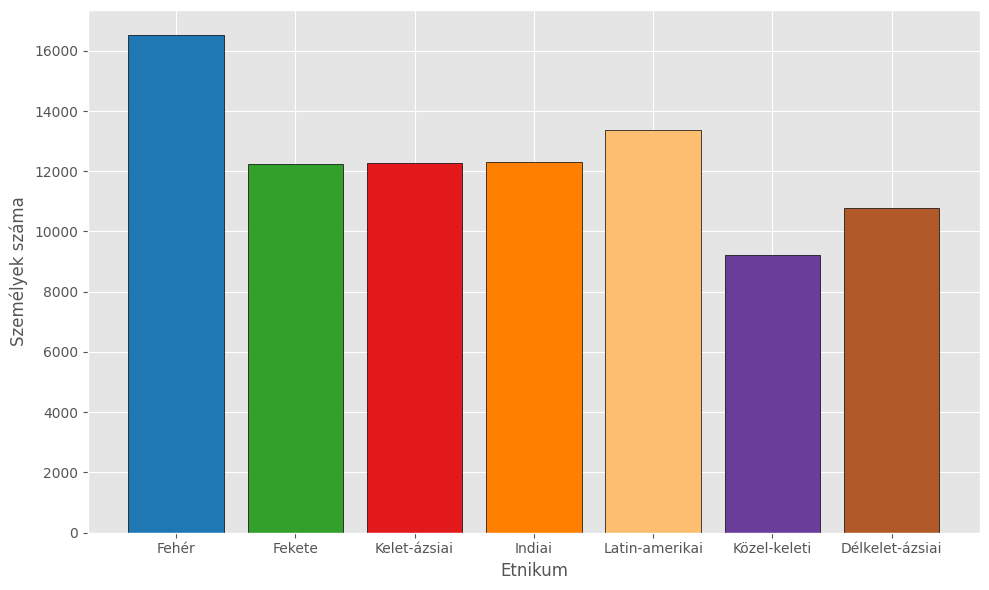

In [3]:
# Fordítás angolról magyarra
race_translation = {
    "White": "Fehér",
    "Black": "Fekete",
    "Latino_Hispanic": "Latin-amerikai",
    "East Asian": "Kelet-ázsiai",
    "Southeast Asian": "Délkelet-ázsiai",
    "Indian": "Indiai",
    "Middle Eastern": "Közel-keleti"
}

# Kívánt elsődleges sorrend
priority_order = ["White", "Black", "East Asian"]

# Teljes, adatokból származó kategóralista
all_races = df["race"].unique().tolist()

# Hátralévő kategóriák hozzáadása az elsődleges sorrend után
remaining_races = [r for r in all_races if r not in priority_order]
custom_order = priority_order + sorted(remaining_races)

# Értékek újrasorrendelve
race_counts = df["race"].value_counts().reindex(custom_order)

# Magyar címkék
race_labels_hu = [race_translation[r] for r in custom_order]

# Színek
custom_colors = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#fdbf6f", "#6a3d9a", "#b15928"]

# Plot kirajzolása
plt.figure(figsize=(10, 6))
plt.bar(race_labels_hu, race_counts, color=custom_colors[:len(race_labels_hu)], edgecolor="black")
plt.xlabel("Etnikum")
plt.ylabel("Személyek száma")
plt.grid(axis="y", color="white", linestyle="-", linewidth=0.8)
plt.tight_layout()
plt.show()


In [4]:
# Nemek arányának kiszámítása
gender_counts = df["gender"].value_counts()
total = gender_counts.sum()

gender_percentages = (gender_counts / total * 100).round(2)

gender_translation = {
    "Male": "Férfi",
    "Female": "Nő"
}

for gender in gender_percentages.index:
    print(f"{gender_translation[gender]}: {gender_percentages[gender]}%")


Férfi: 53.01%
Nő: 46.99%
